<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Laboratorio_2_EoML_Nathalia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2

En este laboratorio exploraremos otra de las bases de datos de juguete en `scikit-learn`. Primero importamos todos los módulos potencialmente útiles:

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import patsy
from patsy import dmatrix

import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

print("Todos los paquetes han sido importados:")
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("patsy version: {}".format(patsy.__version__))
print("Scikit-learn version: {}".format(sklearn.__version__))

Todos los paquetes han sido importados:
Numpy version: 1.14.6
Pandas version: 0.22.0
Matplotlib version: 3.0.3
Seaborn version: 0.7.1
patsy version: 0.5.1
Scikit-learn version: 0.20.3


## Modificando los parámetros de seaborn

[Explora la documentación en seaborn](https://seaborn.pydata.org/tutorial/aesthetics.html) y escoge algún estilo de gráficas para presentar los datos en este Notebook. Los cinco estilos son darkgrid, whitegrid, dark, white, and ticks. Mostramos con este código todos los estilos. Para escoger uno solo para el resto del notbook agrega al código "sns.set_style("nombre del estilo")"

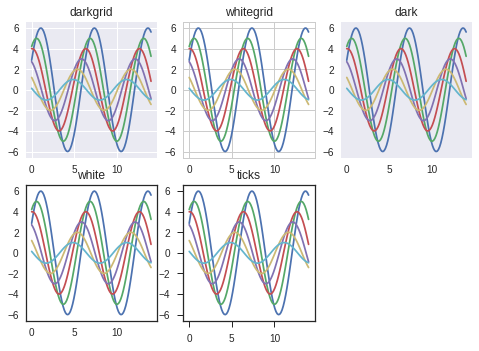

In [0]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

f = plt.figure()
for i in range(len(styles)):
  with sns.axes_style(styles[i]):   # Con with puedes aplicar un estilo solo una vez
    ax = f.add_subplot(2,3,i+1)
    ax.set_title(styles[i])
    sinplot()

sns.set_context("paper")

## Preparando el DataSet

Utilizaremos el "Iris plant dataSet" en [`sklearn.datasets`](https://scikit-learn.org/stable/datasets/index.html#toy-datasets). ¿Cuántas instancias (datos) tenemos? ¿Cuántos predictores se tienen? ¿Qué se desea predecir?

In [0]:
from sklearn.datasets import load_iris
Data = load_iris()

In [0]:
print(Data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Respuesta
nstancias = 150 con 3 clases de 50 instancias cada una.

Predictores = 4 y numericos

Lo que se quiere con la data es reconocer patrones .

Convierte los datos a un DataFrame en panda, y muestra ~.head()

In [0]:
df = pd.DataFrame(data=Data['data'], columns=Data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


¿Cuál es la correlación entre las *clases* de flores?

*Ayuda: Debe de conseguir el mismo resultado que el que se halla en la descripción de los datos.*

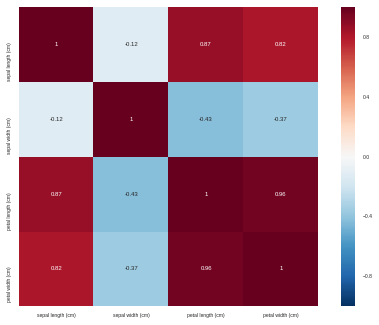

In [0]:
cols = list(df)
cm = np.corrcoef(df.values.T)
sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=cols, xticklabels=cols)

In [0]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Preguntas

Para cada una de las especies de planta, trata de predecir el ancho del sépalo usando las otras tres variables como predictores. Responde a los siguientes:


In [0]:
print(cols)
#Seleccion por clase
iris_setosa = df[:50]
iris_versicolour = df[50:100]
iris_virginia = df[100:]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


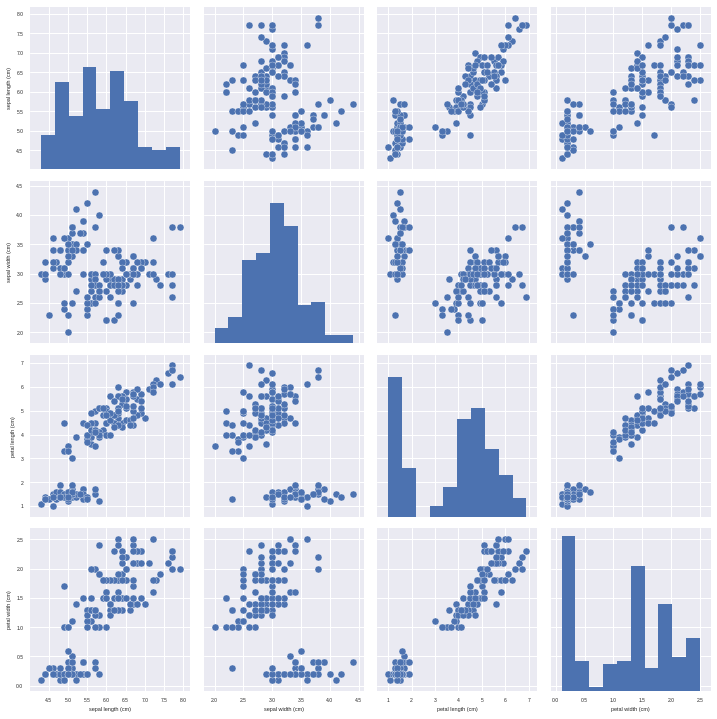

In [0]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


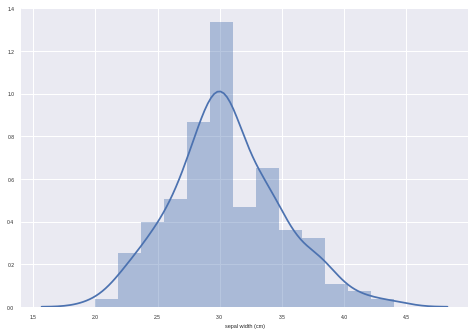

In [0]:
sns.distplot(df['sepal width (cm)'])

#### 1

Ajusta una regresión lineal simple entre cada predictor al ancho de sépalo. ¿En cuáles de los modelos hay una asociación significativa entre predictor y respuesta? Haz gráficas para respaldar tu respuesta.

            Iris Setosa Graphs      

Sepal width vs. Sepal length


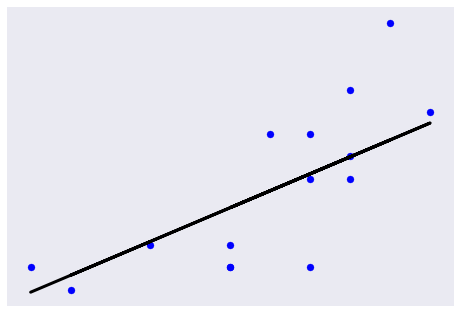


Sepal width vs. petal length


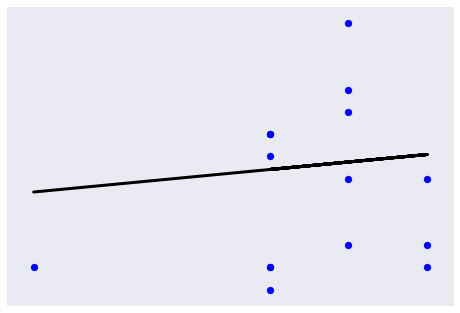


Sepal width vs. Petal width


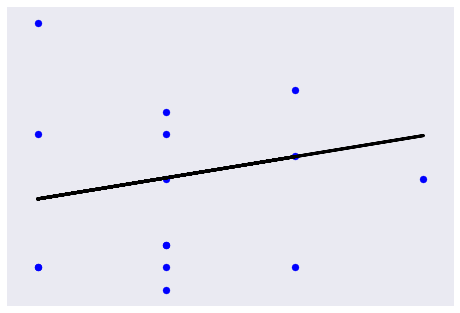

In [0]:
print("            Iris Setosa Graphs      ")
print("")
X = iris_setosa[['sepal length (cm)']]
y = iris_setosa['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. Sepal length")
plt.show()

print("")

X = iris_setosa[['petal length (cm)']]
y = iris_setosa['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. petal length")
plt.show()

print("")

X = iris_setosa[['petal width (cm)']]
y = iris_setosa['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. Petal width")
plt.show()

            Iris Versicolour Graphs      

Sepal width vs. Sepal length


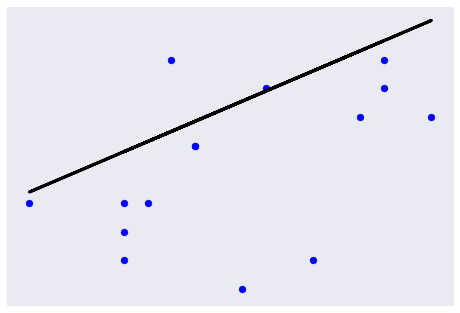


Sepal width vs. petal length


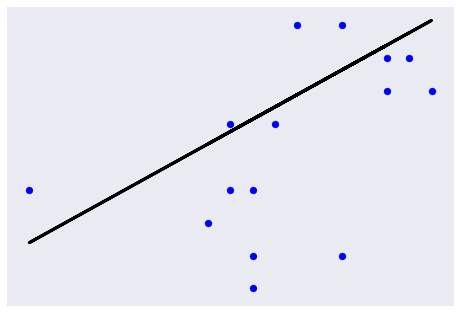


Sepal width vs. Petal width


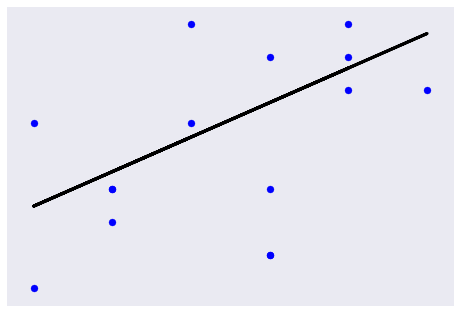

In [0]:
print("            Iris Versicolour Graphs      ")
print("")
X = iris_versicolour[['sepal length (cm)']]
y = iris_versicolour['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. Sepal length")
plt.show()

print("")

X = iris_versicolour[['petal length (cm)']]
y = iris_versicolour['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. petal length")
plt.show()

print("")

X = iris_versicolour[['petal width (cm)']]
y = iris_versicolour['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. Petal width")
plt.show()

            Iris Virginia Graphs      

Sepal width vs. Sepal length


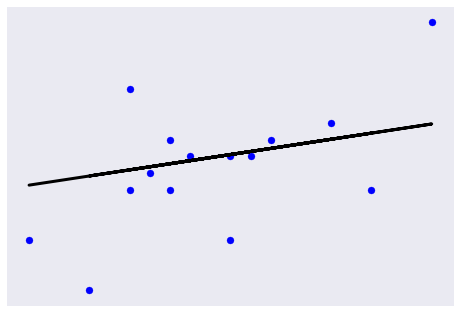


Sepal width vs. petal length


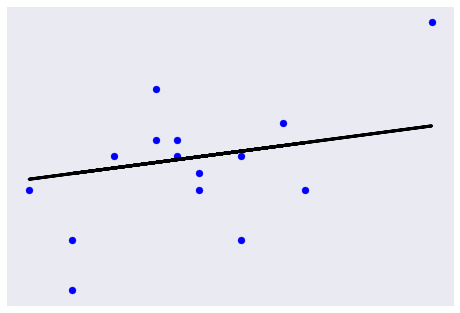


Sepal width vs. Petal width


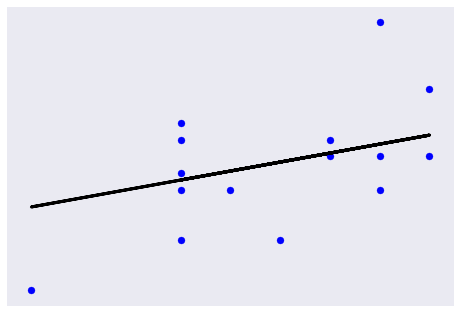

In [0]:
print("            Iris Virginia Graphs      ")
print("")
X = iris_virginia[['sepal length (cm)']]
y = iris_virginia['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. Sepal length")
plt.show()

print("")

X = iris_virginia[['petal length (cm)']]
y = iris_virginia['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. petal length")
plt.show()

print("")

X = iris_virginia[['petal width (cm)']]
y = iris_virginia['sepal width (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regl = LinearRegression().fit(X_train, y_train)
y_pred = regl.predict(X_test)
regl.score(X_test, y_test)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
print("Sepal width vs. Petal width")
plt.show()

#### 2
¿Al menos uno de los predictores es útil para predecir el ancho del sépalo? Haga una prueba de hipótesis para esto.

Iris Setosa
* H0: El largo del sepalo tiene la mayor correlacion con el ancho del sepalo.
Iris Versicolour
* H0: El ancho del petalo tiene la mayor correlacion con el ancho del sepalo.
Iris Virginia
* H0: El largo del sepalo tiene la mayor correlacion con el ancho del sepalo.

#### 3
Considera solo una especie de planta y el modelo generado para predecir el ancho de sépalo. ¿Este funciona bien para las otras especies? Prueba usar los datos de Iris-Setosa como entrenamiento para algún modelo de regresión y úsalo para predecir el ancho de sépalo de las otras dos especies. ¿Hay una diferencia significativa entre las predicciones hechas para cada especie?

In [0]:
iris_setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
X = iris_setosa[["petal width (cm)", "sepal length (cm)", "petal length (cm)"]]
y = iris_setosa["sepal width (cm)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
regl = LinearRegression().fit(X_train, y_train)
p1 = regl.score(X_test, y_test)

y = iris_versicolour["sepal width (cm)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
regl = LinearRegression().fit(X_train, y_train)
p2 = regl.score(X_test, y_test)


y = iris_virginia["sepal width (cm)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
regl = LinearRegression().fit(X_train, y_train)
p3 = regl.score(X_test, y_test)

print(p1)
print(p2)
print(p3)

0.5037460897389674
-0.9535618480401034
0.0753805381041206


*Solamente para él mismo es un buen predictor para conocer el "Sepal Width".*

#### 4
¿Tiene alguna limitante el modelo lineal en este tipo de datos? ¿Qué otro tipo de algoritmo cree que mejoraría su poder de predicción?

El modelo lineal es inflexible lo que provoca la falta de adaptación a la distribución de la data, el modelo lineal tiene una limitante e la cantidad de datos, un algoritmo que podría mejroar el poder de predicción sería uno que fuera flexible.
